## 1. Fast Agent - Build a SQL Agent Fast!

<div style="text-align: right"> Initial issue : 2025.11.05 </div>
<div style="text-align: right"> last update : 2025.11.05 </div>

<img src="./assets/LC_L1_top.png" align="left" width="500">

In [1]:
from dotenv import load_dotenv
from env_utils import doublecheck_env, doublecheck_pkgs
load_dotenv()

True

In [2]:
# Check and print results
doublecheck_env("example.env")  # check environmental variables
doublecheck_pkgs(pyproject_path="pyproject.toml", verbose=True)   # check packages

OPENAI_API_KEY=****VLwA
LANGSMITH_API_KEY=<not set>
LANGSMITH_TRACING=<not set>
LANGSMITH_PROJECT=<not set>
Python 3.12.9 satisfies requires-python: >=3.11,<3.14
package                | required | installed | status | path                                                                            
---------------------- | -------- | --------- | ------ | --------------------------------------------------------------------------------
langgraph              | >=1.0.0  | 1.0.5     | ✅ OK   | …sers/sguys99/Desktop/project/langchain-study/.venv/lib/python3.12/site-packages
langchain              | >=1.0.0  | 1.2.0     | ✅ OK   | …sers/sguys99/Desktop/project/langchain-study/.venv/lib/python3.12/site-packages
langchain-core         | >=1.0.0  | 1.2.5     | ✅ OK   | …sers/sguys99/Desktop/project/langchain-study/.venv/lib/python3.12/site-packages
langchain-openai       | >=1.0.0  | 1.1.6     | ✅ OK   | …sers/sguys99/Desktop/project/langchain-study/.venv/lib/python3.12/site-packages
langchain-

In [3]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///Chinook.db")

In [4]:
db

In [5]:
db.get_table_info()

'\nCREATE TABLE "Album" (\n\t"AlbumId" INTEGER NOT NULL, \n\t"Title" NVARCHAR(160) NOT NULL, \n\t"ArtistId" INTEGER NOT NULL, \n\tPRIMARY KEY ("AlbumId"), \n\tFOREIGN KEY("ArtistId") REFERENCES "Artist" ("ArtistId")\n)\n\n/*\n3 rows from Album table:\nAlbumId\tTitle\tArtistId\n1\tFor Those About To Rock We Salute You\t1\n2\tBalls to the Wall\t2\n3\tRestless and Wild\t2\n*/\n\n\nCREATE TABLE "Artist" (\n\t"ArtistId" INTEGER NOT NULL, \n\t"Name" NVARCHAR(120), \n\tPRIMARY KEY ("ArtistId")\n)\n\n/*\n3 rows from Artist table:\nArtistId\tName\n1\tAC/DC\n2\tAccept\n3\tAerosmith\n*/\n\n\nCREATE TABLE "Customer" (\n\t"CustomerId" INTEGER NOT NULL, \n\t"FirstName" NVARCHAR(40) NOT NULL, \n\t"LastName" NVARCHAR(20) NOT NULL, \n\t"Company" NVARCHAR(80), \n\t"Address" NVARCHAR(70), \n\t"City" NVARCHAR(40), \n\t"State" NVARCHAR(40), \n\t"Country" NVARCHAR(40), \n\t"PostalCode" NVARCHAR(10), \n\t"Phone" NVARCHAR(24), \n\t"Fax" NVARCHAR(24), \n\t"Email" NVARCHAR(60) NOT NULL, \n\t"SupportRepId" INTEG

In [6]:
db.get_context()

{'table_info': '\nCREATE TABLE "Album" (\n\t"AlbumId" INTEGER NOT NULL, \n\t"Title" NVARCHAR(160) NOT NULL, \n\t"ArtistId" INTEGER NOT NULL, \n\tPRIMARY KEY ("AlbumId"), \n\tFOREIGN KEY("ArtistId") REFERENCES "Artist" ("ArtistId")\n)\n\n/*\n3 rows from Album table:\nAlbumId\tTitle\tArtistId\n1\tFor Those About To Rock We Salute You\t1\n2\tBalls to the Wall\t2\n3\tRestless and Wild\t2\n*/\n\n\nCREATE TABLE "Artist" (\n\t"ArtistId" INTEGER NOT NULL, \n\t"Name" NVARCHAR(120), \n\tPRIMARY KEY ("ArtistId")\n)\n\n/*\n3 rows from Artist table:\nArtistId\tName\n1\tAC/DC\n2\tAccept\n3\tAerosmith\n*/\n\n\nCREATE TABLE "Customer" (\n\t"CustomerId" INTEGER NOT NULL, \n\t"FirstName" NVARCHAR(40) NOT NULL, \n\t"LastName" NVARCHAR(20) NOT NULL, \n\t"Company" NVARCHAR(80), \n\t"Address" NVARCHAR(70), \n\t"City" NVARCHAR(40), \n\t"State" NVARCHAR(40), \n\t"Country" NVARCHAR(40), \n\t"PostalCode" NVARCHAR(10), \n\t"Phone" NVARCHAR(24), \n\t"Fax" NVARCHAR(24), \n\t"Email" NVARCHAR(60) NOT NULL, \n\t"Supp

In [7]:
db.get_usable_table_names()

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

Runtime context 정의: 에이전트와 도구가 db에 접근하도록 하기 위함
- dataclass는 데이터를 자정하는 클래스를 만들어주는 데코레이터
- RuntimeContext는 에이전트가 실행하는 동안 공유 리소스를 담는 컨테이너, 여기서는 SQLDatabase 인스턴스를 담고 있다.

In [8]:
from dataclasses import dataclass

# define context structure to support dependency injection
@dataclass
class RuntimeContext:
    db: SQLDatabase # 타입힌팅, db는 SQLDatabase 타입

In [9]:
# 테스트

test_context = RuntimeContext(db=db)
test_context.db.get_table_names()


/var/folders/l_/8kygc87n5q1d13jbjvmg1mdm0000gn/T/ipykernel_50666/1311928232.py:4: LangChainDeprecationWarning: The method `SQLDatabase.get_table_names` was deprecated in langchain-community 0.0.1 and will be removed in 1.0. Use `get_usable_table_names` instead.
  test_context.db.get_table_names()


['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [10]:
from langchain_core.tools import tool
from langgraph.runtime import get_runtime

@tool
def execute_sql(query: str) -> str:
    """Execute a SQLite command and return results."""
    runtime = get_runtime(RuntimeContext)
    db = runtime.context.db # 런타임 아래 컨텍스트에 dataclass로 정의한 것들이 보관
    # 실제 DB 인스턴스는 에이전트 실행 시점에 주입된다.(dependency injection) 매커니즘

    try:
        return db.run(query)
    except Exception as e:
        return f"Error: {e}"

즉, runtime이란, 에이전트가 실행되는 동안 필요한 공유 상태나 리소스를 관리하는 실행 환경.  
데이터베이스 연결, 설정 값, API 클라이언트 등 여러가지 도구들이 공통으로 사용해야하는 자원을 담고 있음.   

일종의 의존성 주입(Dependency Injection) 메커니즘임.   
에이전트 실행 중에 필요한 공유 자원(DB 연결, API 클라이언트, 설정값 등)을 깔끔하게 전달하는 방법임   

tool 접근은 get_runtime(RuntimeContext)로 주입된 context 가져오기 가능  
여기서는 runtime.context.db로 주입받은 db 접근 가능

이제 시스템 프롬프트를 정의한다.

In [11]:
SYSTEM_PROMPT = """You are a careful SQLite analyst.

Rules:
- Think step-by-step.
- When you need data, call the tool `execute_sql` with ONE SELECT query.
- Read-only only; no INSERT/UPDATE/DELETE/ALTER/DROP/CREATE/REPLACE/TRUNCATE.
- Limit to 5 rows of output unless the user explicitly asks otherwise.
- If the tool returns 'Error:', revise the SQL and try again.
- Prefer explicit column lists; avoid SELECT *.
"""

에이전트 생성

In [12]:
from langchain.agents import create_agent

agent = create_agent(
    model="openai:gpt-5-mini",
    tools=[execute_sql],
    system_prompt=SYSTEM_PROMPT,
    context_schema=RuntimeContext, # 에이전트에게 스키마 알려줌
)

ReAct Loop 디스플레이

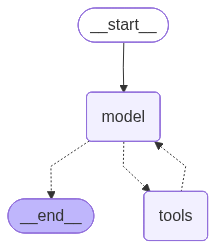

In [13]:
from IPython.display import Image, display

display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

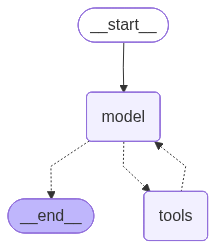

In [14]:
display(Image(agent.get_graph(xray=False).draw_mermaid_png()))

쿼리 실행
- 에이전트는 데이터베이스 스키마를 가지고 있지 않으므로 독립적으로 발견해야 함.
- 에이전트는 실수를 할 수 있음! 에이전트는 오류 메시지를 반환함으로써 쿼리를 자체 수정할 수 있음.
- 에이전트를 `agent.stream`으로 호출한다는 점에 유의하세요.
    - 이 명령어와 `pretty_print`는 모델과 도구 간 정보를 전달하는 **메시지**를 표시합니다.
- 에이전트는 호출 간 스키마를 기억하지 않습니다... 이에 대해서는 나중에 자세히 설명하겠습니다!

In [15]:
question = "어떤 테이블이 가장 많은 항목을 가지고 있나요?"

for step in agent.stream(
    {"messages": question},
    context=RuntimeContext(db=db),
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

어떤 테이블이 가장 많은 항목을 가지고 있나요?
================================== Ai Message ==================================
Tool Calls:
  execute_sql (call_WLQ5OUOWZ4lYQoR5QiYrpQJk)
 Call ID: call_WLQ5OUOWZ4lYQoR5QiYrpQJk
  Args:
    query: SELECT name, type, tbl_name, sql FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%' ORDER BY name LIMIT 5;
================================= Tool Message =================================
Name: execute_sql

[('Album', 'table', 'Album', 'CREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)'), ('Artist', 'table', 'Artist', 'CREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Art

In [16]:
question = "평균적으로 어떤 장르가 가장 긴 트랙을 가지고 있나?"

for step in agent.stream(
    {"messages": question},
    context=RuntimeContext(db=db),
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

평균적으로 어떤 장르가 가장 긴 트랙을 가지고 있나?
================================== Ai Message ==================================
Tool Calls:
  execute_sql (call_7202DoZlRUcnNA9msSs2Fl2V)
 Call ID: call_7202DoZlRUcnNA9msSs2Fl2V
  Args:
    query: SELECT g.Name AS genre, ROUND(AVG(t.Milliseconds)/1000.0,2) AS avg_seconds, ROUND(AVG(t.Milliseconds)/(1000.0*60),2) AS avg_minutes FROM Track t JOIN Genre g ON t.GenreId = g.GenreId GROUP BY g.Name ORDER BY AVG(t.Milliseconds) DESC LIMIT 1;
================================= Tool Message =================================
Name: execute_sql

[('Sci Fi & Fantasy', 2911.78, 48.53)]
================================== Ai Message ==================================

평균 트랙 길이가 가장 긴 장르는 "Sci Fi & Fantasy"입니다.

- 평균 길이: 2,911.78초 ≈ 48.53분 ≈ 48분 31.8초

제가 실행한 쿼리는 장르별 트랙 길이(Milliseconds)의 평균을 계산하여 가장 큰 항목을 반환한 것입니다. 전체 장르별 순위나 원본 쿼리를 보고 싶으시면 알려주세요.
